# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('Donor_choose/train_data.csv')
resource_data = pd.read_csv('Donor_choose/resources.csv')

In [3]:
project_data = project_data[:40000]

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (40000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [00:18<00:00, 2213.33it/s]


In [18]:
project_data["cleaned_essay"] = preprocessed_essays

In [19]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
from tqdm import tqdm
import re
import string
from bs4 import BeautifulSoup
preprocessed_title_text = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub("\S*\d\S*", "", sent).strip()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_text.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 40000/40000 [00:01<00:00, 39273.93it/s]


In [21]:
project_data['cleaned_title_text'] = preprocessed_title_text

## 1.5 Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'cleaned_essay',
       'cleaned_title_text'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [23]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer1.fit_transform(project_data['clean_categories'].values)
print(vectorizer1.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (40000, 9)


In [24]:
# we use count vectorizer to convert the values into one 
vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer2.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer2.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'ForeignLanguages', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (40000, 30)


In [25]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [26]:
project_data['teacher_prefix'].replace(np.nan,'Mrs.',inplace=True)

In [27]:
teacher_prefix = project_data['teacher_prefix'].unique()

In [28]:
# teacher_prefix
vectorizer3 = CountVectorizer(vocabulary = list(teacher_prefix), lowercase=False, binary=True)
vectorizer3.fit(project_data['teacher_prefix'].values)
teacher_prefix_one_hot = vectorizer3.transform(project_data['teacher_prefix'].values)
print(vectorizer3.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']
Shape of matrix after one hot encodig  (40000, 5)


In [29]:
vectorizer4 = CountVectorizer()
school_state_one_hot = vectorizer4.fit_transform(project_data['school_state'].values)
print(vectorizer4.get_feature_names())
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix after one hot encodig  (40000, 51)


In [30]:
project_grade_category= project_data['project_grade_category'].unique()

vectorizer5 = CountVectorizer(vocabulary=list(project_grade_category), lowercase=False, binary=True)
project_grade_category_one_hot = vectorizer5.fit_transform(project_data['project_grade_category'].values)
print(vectorizer5.get_feature_names())
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['Grades PreK-2', 'Grades 6-8', 'Grades 3-5', 'Grades 9-12']
Shape of matrix after one hot encodig  (40000, 4)


### 1.5.2 Vectorizing Text data

* I am using TFIDF WEIGHTED W2V because i got best auc score on this model

#### 1.5.2.1 TFIDF WEIGHTED W2v

In [31]:
list_preprocessed_essays = []
for e in project_data['cleaned_essay'].values:
    list_preprocessed_essays.append(e.split())
    
from gensim.models import Word2Vec
preprocessed_essays_w2v=Word2Vec(list_preprocessed_essays,min_count=10,size=100,workers = 8)

In [32]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model1 = TfidfVectorizer()
tfidf_model1.fit(project_data['cleaned_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model1.get_feature_names(), list(tfidf_model1.idf_)))
tfidf_words = set(tfidf_model1.get_feature_names())

In [33]:
# average Word2Vec
# compute average word2vec for each review.
preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data['cleaned_essay']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in list(preprocessed_essays_w2v.wv.vocab)) and (word in tfidf_words):
            vec = preprocessed_essays_w2v[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(preprocessed_essays_tfidf_w2v_vectors))
print(len(preprocessed_essays_tfidf_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████████| 40000/40000 [16:26<00:00, 40.54it/s]


40000
100


In [34]:
list_preprocessed_title = []
for e in project_data['cleaned_title_text'].values:
    list_preprocessed_title.append(e.split())
    
preprocessed_title_w2v=Word2Vec(list_preprocessed_title,min_count=10,size=100,workers = 8)

In [35]:
# Similarly you can vectorize for title also
tfidf_model2 = TfidfVectorizer()
tfidf_model2.fit(project_data['cleaned_title_text'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model2.get_feature_names(), list(tfidf_model2.idf_)))
tfidf_words = set(tfidf_model2.get_feature_names())

In [36]:
preprocessed_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data['cleaned_title_text']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in list(preprocessed_title_w2v.wv.vocab)) and (word in tfidf_words):
            vec = preprocessed_title_w2v[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    preprocessed_title_tfidf_w2v_vectors.append(vector)

print(len(preprocessed_title_tfidf_w2v_vectors))
print(len(preprocessed_title_tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [00:06<00:00, 6351.51it/s]


40000
100


### 1.5.3 Vectorizing Numerical features

In [37]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [38]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 299.04543299999995, Standard deviation : 378.92596281832226


In [39]:
price_standardized

array([[-3.81196981e-01],
       [-1.19899412e-04],
       [ 5.74794520e-01],
       ...,
       [-3.96899257e-01],
       [-3.78689895e-01],
       [-2.54813453e-01]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [40]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(school_state_one_hot.shape)
print(project_grade_category_one_hot.shape)
print(len(preprocessed_title_tfidf_w2v_vectors))
print(len(preprocessed_essays_tfidf_w2v_vectors))
print(price_standardized.shape)

(40000, 9)
(40000, 30)
(40000, 5)
(40000, 51)
(40000, 4)
40000
40000
(40000, 1)


In [41]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot,school_state_one_hot,project_grade_category_one_hot,\
            preprocessed_essays_tfidf_w2v_vectors,preprocessed_title_tfidf_w2v_vectors, price_standardized))
y=project_data['project_is_approved'].values
X.shape

(40000, 300)

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [42]:
from sklearn.feature_selection import SelectKBest,  f_classif 

Selector = SelectKBest( f_classif ,k=150)
X_new = Selector.fit_transform(X,y)

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning:

Features [0 0 0 0 0 0 0 0] are constant.



In [43]:
X_new.shape

(40000, 150)

<h2>2.5 Apply Kmeans</h2>

In [48]:
from sklearn.cluster import KMeans

inertias = []
for e in range(1,6):
    kmeans = KMeans(n_clusters=e, random_state=0,n_jobs=4)
    kmeans.fit(X_new)
    inertias.append(kmeans.inertia_)

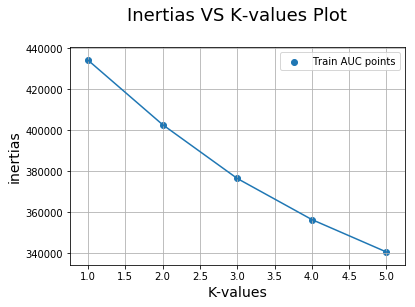

In [49]:
# Draw Loss VS K values plot
plt.plot(range(1,6), inertias)
plt.scatter(range(1,6), inertias, label='Train AUC points')
plt.xlabel('K-values',size=14)
plt.ylabel('inertias',size=14)
plt.title('Inertias VS K-values Plot\n',size=18)
plt.grid()
plt.legend()
plt.show()

### OBSERVATION : 
* There is inflection at k =2 .So our optimal k = 2

In [50]:
optimal_k = 2

In [51]:
kmeans = KMeans(n_clusters=optimal_k , n_jobs=4).fit(X_new)

In [52]:
essays = project_data['cleaned_essay'].values
# Getting all the essays in different clusters
cluster1 = []
cluster2 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(essays[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(essays[i]) 
        
# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))

No. of essays in Cluster-1 :  19538

No. of essays in Cluster-2 :  20462


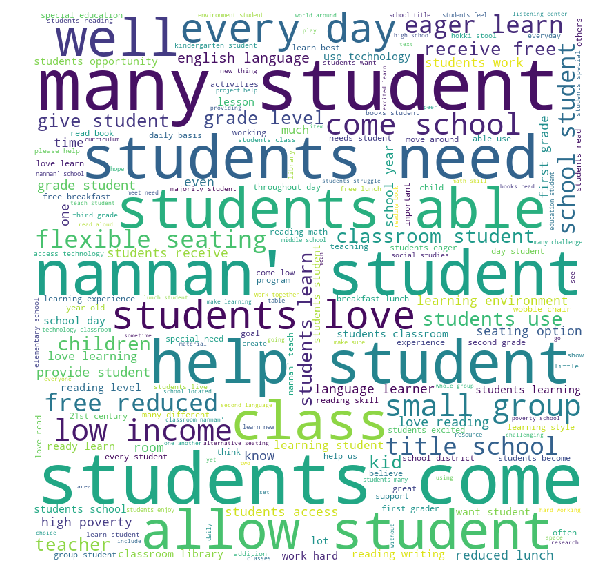

In [53]:
from wordcloud import WordCloud

word = str(cluster1)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION :
* in this cluster 'low income','high poverty word' are seen.

In [54]:
cluster1[500 : 510]

['education not filling pail lighting fire w b yeats our classroom safe learning environment students encouraged challenge ideas research questions make mistakes try new things smile fun classmates become lifelong learners my students wonderful group hardworking children love learn explore new concepts school provides students safe positive learning environment grow socially academically developmentally my school promotes cooperative learning independent thinking encourages students become lifelong learners technology provides students engaging individualized programs meet needs students students learn variety ways technology one tool helps students study master concepts subjects my students excited come school learn the chromebooks used enhance learning subjects my students able use online programs provide individualized learning paths student in reading students able read books online access many reading materials in mathematics students able engaging exciting way practice skills may

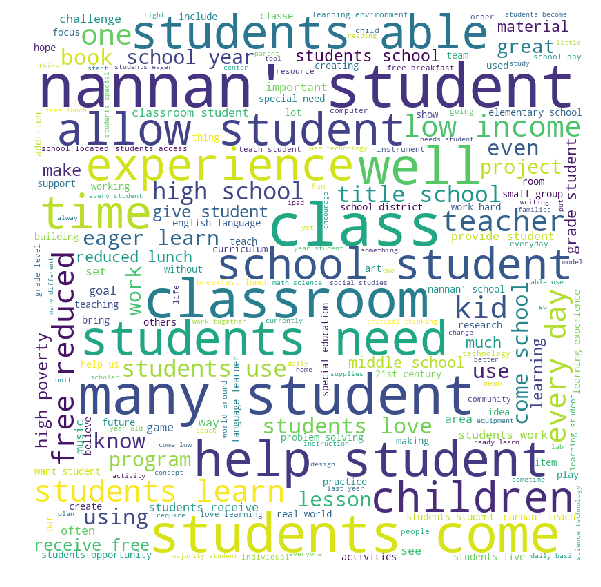

In [55]:
from wordcloud import WordCloud

word = str(cluster2)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION :
* This cluster signifies urban area and facilities in colleges and high level schools 

In [56]:
cluster2[500:510]

['my class consists lecture hands activities i would like students better prepared college familiar lab safety equipment technique we lab week reflects information presented week we located military town therefore students diverse backgrounds 75 students free reduced price lunches may first go college families others professional families with support helping make students dreams come true this project give ap biology students two fluorescent light assemblies need successfully master objectives concepts needed successfully pass ap biology exam these lights give students ability grow various plants inspection learning genetics plants plants reproduce my students also using kit express learning art creating 3d models videos drawings art huge aspect learning gives students endless opportunities express true understanding objectives these students amazing group always strive best classroom outside my students come variety diverse backgrounds including poverty military families my students 

<h2>2.6 Apply AgglomerativeClustering</h2>

### PROCEDURE :
* STEP 1 => As it Agglomerative Clustering takes lot of time .So i am taking 5000 points.
* STEP 2 => Performing Agglomerative Clustering at k = 2 and k = 5.

### PERFORMING AGGLOMERATIVE CLUSTERING AT K=2

In [57]:
X1 = X_new[:5000,:]
y1 = project_data['project_is_approved'][:5000].values

In [58]:
X1.shape

(5000, 150)

In [59]:
from sklearn.cluster import AgglomerativeClustering

agg1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agg1.fit(X1.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [60]:
essays = project_data['cleaned_essay'][:5000].values
# Getting all the essays in different clusters
cluster1 = []
cluster2 = []

for i in range(agg1.labels_.shape[0]):
    if agg1.labels_[i] == 0:
        cluster1.append(essays[i])
    elif agg1.labels_[i] == 1:
        cluster2.append(essays[i]) 
        
# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))

No. of essays in Cluster-1 :  4348

No. of essays in Cluster-2 :  652


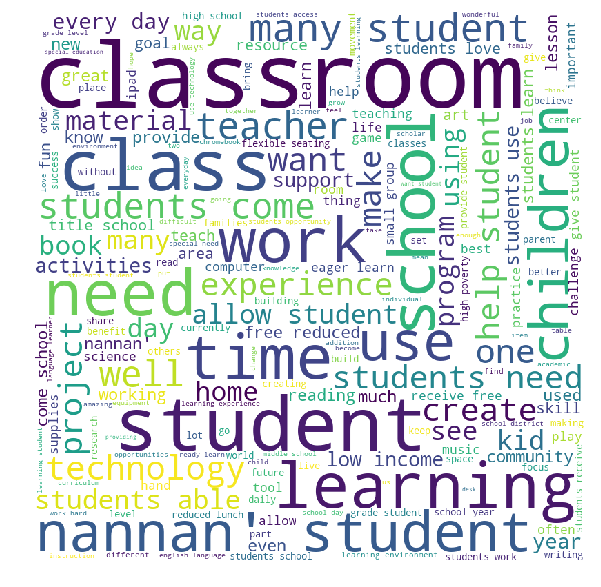

In [61]:
from wordcloud import WordCloud

word = str(cluster1)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION :
* This cluster is focusing on technologies like chromebook

In [62]:
cluster1[500:510]

['i diverse group students they eager learn work hard i make learning exciting my students mostly made low income students various backgrounds many english language learners they not trying master foundation kindergarten sets also trying master complex language english my student willing work hard get job done reach goals i set these materials used center classroom i think make difference students lives many students english language learners helps hear story read voice listening centers also great students begin learning read they able track words follow along read i think awesome use technology students i able use years come nannan',
 'our school small rural arts focus school children attend hearts bigger stars sky mrs kimbrell i love my students express sentiment throughout school day they loving kindhearted children i look forward spending day my second graders eager read write explore take chances classroom feel safe know loved return i would give moon i could my students exposed 

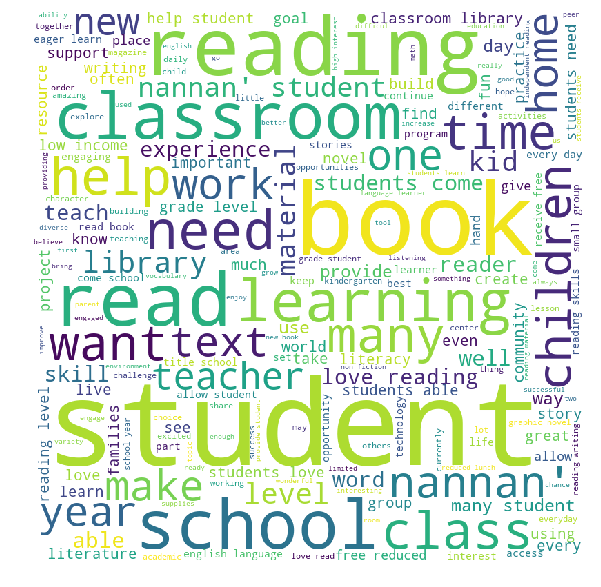

In [63]:
from wordcloud import WordCloud

word = str(cluster2)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION :
* This cluster is also talking digital eduucation

In [64]:
cluster2[500:505]

['the biggest challenge i face providing enough access technology help students understand use electronic devices advantage this year i going move comfort zone educate students utilize embrace electronic benefits i strive develop love learning i want school place students look forward coming every day i provide opportunities stretch imaginations challenge they unique talents intelligence contribute class whole i love reading i love teach reading the key teaching reading provide students variety genres provide books students like interested reading currently students sharing reading graphic novels class i decided capitalize high interest genre my students love graphic novels i want use graphic novels encourage critical analysis text illustrations i planning teach whole group critically analyze text illustrations multiple experiences graphic novels during small group instruction i support individual reader needs develop mastery text analysis working talking aloud students create individu

In [65]:
agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
agg2.fit(X1.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [66]:
essays = project_data['cleaned_essay'][:5000].values
# Getting all the essays in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for i in range(agg2.labels_.shape[0]):
    if agg2.labels_[i] == 0:
        cluster1.append(essays[i])
    elif agg2.labels_[i] == 1:
        cluster2.append(essays[i])
    elif agg2.labels_[i] == 2:
        cluster3.append(essays[i])
    elif agg2.labels_[i] == 3:
        cluster4.append(essays[i])
    else:
        cluster5.append(essays[i])
        
# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))
print("\nNo. of essays in Cluster-3 : ",len(cluster3))
print("\nNo. of essays in Cluster-4 : ",len(cluster4))
print("\nNo. of essays in Cluster-5 : ",len(cluster5))

No. of essays in Cluster-1 :  884

No. of essays in Cluster-2 :  168

No. of essays in Cluster-3 :  2618

No. of essays in Cluster-4 :  652

No. of essays in Cluster-5 :  678


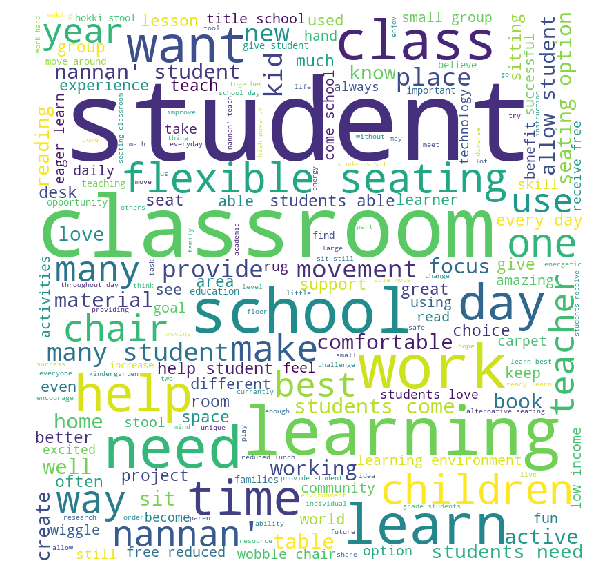

In [67]:
from wordcloud import WordCloud

word = str(cluster1)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION :
* This cluster is all about 'kid' and 'children'

In [68]:
cluster1[300:310]

['as teacher low income high poverty school district students faced several challenges classroom despite many challenges face i looking keep things simple provide students creative meaningful learning experiences they deserve unique opportunities not gotten far they use sitting one space long they need move explore order successful learners giving students chance mobile classroom important i want provide choice sit daily my students learn better seated comfortably way feel best research proves students learn better given choice learning takes place i want students chance take materials around room they also need choices including pillows sit comfortably floor this help students engaged learning excited learn new material nannan',
 'my students active learn best moving they get along one another well seriously every teacher dream class my students eager learners love coming school struggle stay stationary chairs extended periods time we use brain breaks quite often need something help g

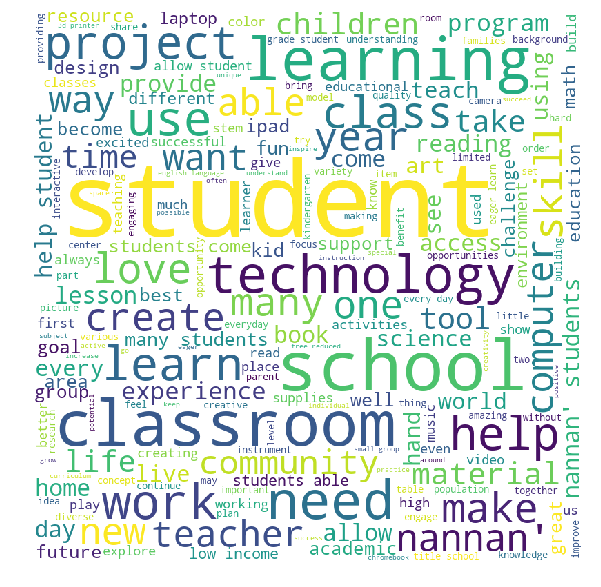

In [69]:
from wordcloud import WordCloud

word = str(cluster2)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION :
* This cluster is showing 'technology' as it is a big word in word cloud of this cluster
* In paragraph chromebooks are repeated 3-4 times

In [86]:
cluster2[150:160]

['my students come variety backgrounds 95 students fall poverty rate our school located poorest district country many students also learning challenges therefore many individual education plans modified promotional criteria i serve diverse population students transition 10th grade one common fabric glues students together disenfranchised strive towards resolution in fact complete high school pursue college would first family attend college while disenfranchised exhibit relentless overcome social constructs among barriers achieve dreams in addition vibrant participate community restoration activities eager take steps needed improve community relations in fact successfully orchestrated carried cultural event drew wide attraction educational institution the educational institution i affiliated established stimulating therapeutic community facilitates learning discipline sense self identity sense belonging we requesting one macbook air students practice math skills pace also students get g

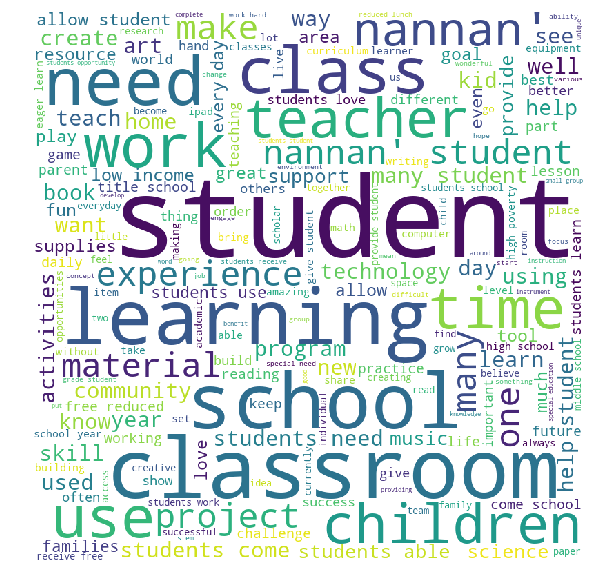

In [71]:
from wordcloud import WordCloud

word = str(cluster3)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION :
* This cluster is giving information about 'low income' and 'projects'

In [72]:
cluster3[350:360]

['the students class special amazing they work hard every day learn new things my students worked since beginning year learn reading writing math friendship treating others way want treated they working learning great student friend person i believe make learning experience best effective amazing time ever dreamed they long educational road ahead i want fall love learning my students learning lot throughout day since 5 6 struggle sit long wiggle seats help us move around learning not distract students learning we want cushions move parts classroom assist us areas learning we use tables writing guided reading literacy stations floor whole group carpet time i know students able move work academic success soar i looking forward seeing students grow change nannan',
 'every single student school receives music education many students also involved band chorus groups bring great joy lives we seen much improvement school student involvement arts students excited come school come music class s

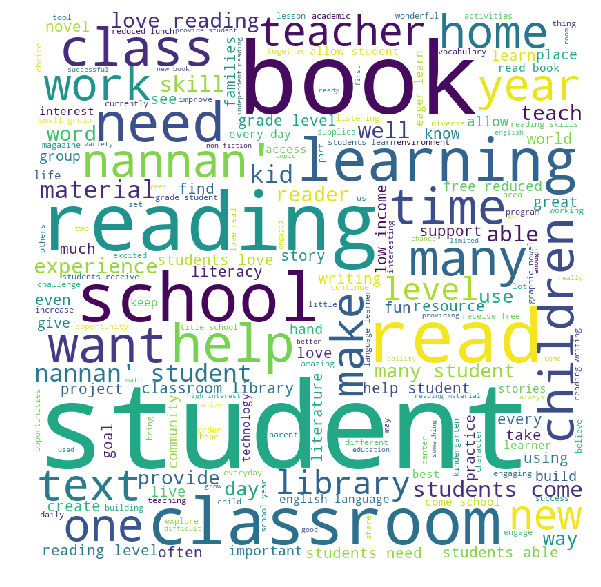

In [73]:
from wordcloud import WordCloud

word = str(cluster4)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION :
* This cluster is focusing on book as you can see in wordcloud

In [87]:
cluster4[100:110]

['my third grade students lovable energetic children always eager learn new things they look forward school day provided inquiry based learning our school pre k third grade student body we title i school rural community our goal provide enriching challenging education possible students our beautiful classroom warm caring environment conducive types wonderful learning experiences reading great exciting literature best thing teacher share students i fortunate 500 titles books classroom available students read we need organization space books we funding project cubbies hold books organized different genres as third graders given free choice choosing reading books for formal lessons activities students required complete reading projects according specific genres any donations project much appreciated valued years come nannan',
 'my school classroom diverse population many backgrounds coming together always inspiring that said many students lack necessary resources school supplies free redu

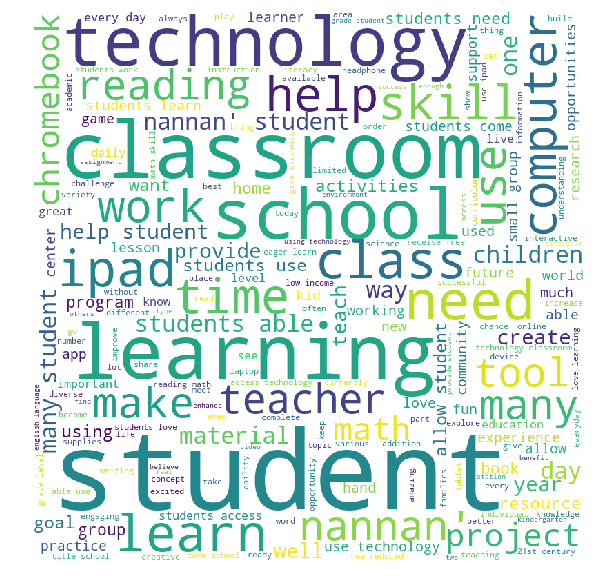

In [75]:
from wordcloud import WordCloud

word = str(cluster5)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION:
* This cluster is focusing on ipad as you can see in wordcloud

In [88]:
cluster5[300:310]

['my school large urban district all students receive free breakfast lunch everyday it pre k 8th grade building the schools built 1960 most students live neighborhood ride school bus school students come school everyday excited learn eager part learning experience they enjoy learning groups projects working hands materials they 25 30 students classes many students need practice basic math skills students able play games involve math skills the activities give students fun way practice students able play games groups 2 3 4 players students able strengthen math skills learning get along work together playing games students enjoy games chance work different partners class the games cover different math skills grade level this also allow student play game lower level advance depending abilities individual needs nannan',
 'the students school resilient they much school year these students shift schools due school reassignment plans some lost homes displaced due historic flood 2016 left pari

<h2>2.7 Apply DBSCAN</h2>

### PROCEDURE :
* STEP 1 => I can take few points for DBSCAN So i will take only 5000 and top 100 features
* STEP 1 => Typically min points = 2 x dimensionality of X  i.e 200

In [44]:
X2 = X_new[:5000, : 100]
y2 = project_data['project_is_approved'][:5000].values

In [45]:
X2.shape

(5000, 100)

### ELBOW method to find right epsilon

In [46]:
# function to find of nth nearest neighbors from all points
def n_neighbors(vectors , n):
    distance = []
    for point in vectors:
        temp = np.sort(np.sum((vectors-point)**2,axis=1),axis=None)
        distance.append(temp[n])
    return np.sqrt(np.array(distance))

In [47]:
min_points = 2 * X2.shape[1]

# computing sorted distances of nth nearest neighbours
distances = n_neighbors(X2.toarray(),min_points)
sorted_distances = np.sort(distances)
point_index = [i for i in range(X2.shape[0])]

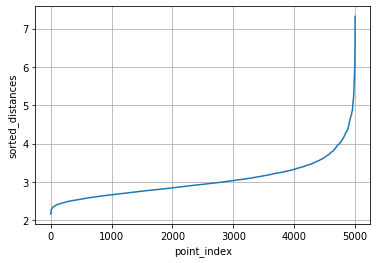

In [48]:
plt.plot(point_index,sorted_distances)
plt.xlabel('point_index')
plt.ylabel('sorted_distances')
plt.grid()
plt.show()

### OBSERVATION  :
* Right epsilon is 3.5

In [49]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3.5, min_samples=min_points, n_jobs=-1).fit(X2)
    
# Number of clusters in labels, ignoring noise(-1) if present.
n_clusters = len(set(db.labels_))
print("Number of clusters for MinPts = %d and Epsilon = %f is : %d "%(min_points,3.5,n_clusters))
print("Labels(-1 is for Noise) : ",set(db.labels_))

Number of clusters for MinPts = 200 and Epsilon = 3.500000 is : 2 
Labels(-1 is for Noise) :  {0, -1}


Text(0, 0.5, 'Dim_2')

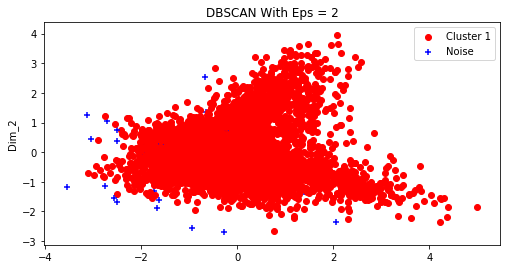

In [50]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2).fit_transform(X2.toarray())

# Scatter plot for DBSCAN with Eps = 2
plt.figure(figsize=(18,9))
plt.subplot(221)
for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 2')
plt.ylabel('Dim_2')

In [51]:
essays = project_data['cleaned_essay'][:5000].values
# Getting all the essays in different clusters
cluster1 = []
cluster2 = []

for i in range(db.labels_.shape[0]):
    if db.labels_[i] == 0:
        cluster1.append(essays[i])
    elif db.labels_[i] == -1:
        cluster2.append(essays[i]) 
        
# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))

No. of essays in Cluster-1 :  4970

No. of essays in Cluster-2 :  30


### NOTE : Cluster2 is Noise in DBSCAN

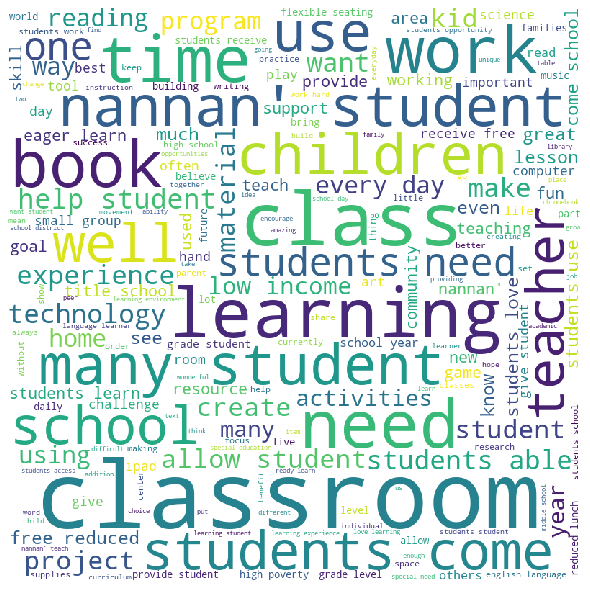

In [52]:
from wordcloud import WordCloud

word = str(cluster1)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION: 
* This cluster is talking about technology(chromebooks,ipads) and classroom

In [53]:
cluster1[810:820]

['my students rural community they come different backgrounds some live biological parents grandparents aunts uncles a couple parents jail child lives family members the students energetic ready learn several students free reduced lunch they looking ways learn achieve lifetime goals they need ipads help competitive world grow future technology future our future bright students the students eager learn natural technology students work together groups ipads improve learning reading phonics comprehension spelling math social studies science the ipads keep engaged excited learning independently groups many students not computers internet home i want give every advantage deserve become doctors nurses scientists vets etc want lives nannan',
 'i wonderful students creative thoughtful excited learn they future designers leaders parents workforce my students come hard working families want good things children things budget school budget cannot provide my small school district diverse populatio

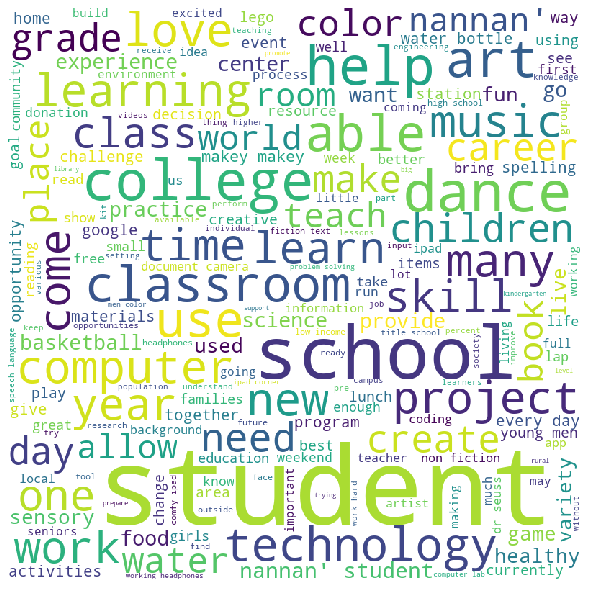

In [54]:
from wordcloud import WordCloud

word = str(cluster2)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(word)

plt.figure(figsize= (8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### OBSERVATION : 
* This cluster is a Noise cluster
* This cluster is focusing on college environment as you can see 'college' word in wordcloud

In [66]:
cluster2[:10]

['i school counselor amazing students come variety socioeconomic cultural backgrounds we title 1 school students free reduced lunch our students qualify fee waivers help pay college applications entrance exams receive financial aid our driven hardworking students likely first family graduate high school many not support education often making big life decisions our students often struggle worry money pay college most students never visited college campus first generation college students we trying create college going culture campus get students excited futures we host college wear wednesdays promote various colleges give away college shirts week we also college signing day rally near may 1st recognize students made pledge higher education our students first generation college students many not know need take go college many also not money purchase everything would need dorm rooms their families often struggle make ends meet would not able help buy many items we would like give away it

### Comparing all models

In [65]:
from prettytable import PrettyTable

pretty = PrettyTable()

pretty.field_names = ['MODEL','No. of clusters','About_cluster1','About_cluster2','About_cluster3','About_cluster4','About_cluster5']

pretty.add_row(['Kmeans','2','low income and high poverty(rural areas)','high facilities(urban areas)','','',''])
pretty.add_row(['Agglomerative','2','focusing on chromebooks','digital education','','',''])
pretty.add_row(['Agglomerative','5','kid and children','technology(chromebooks)',' low income and projects','book','ipad'])
pretty.add_row(['DBSCAN','2(with 2nd cluster as Noise)','technology(chromebooks,ipads) and classroom','college environment(Noise)','','',''])

print(pretty)

+---------------+------------------------------+---------------------------------------------+------------------------------+--------------------------+----------------+----------------+
|     MODEL     |       No. of clusters        |                About_cluster1               |        About_cluster2        |      About_cluster3      | About_cluster4 | About_cluster5 |
+---------------+------------------------------+---------------------------------------------+------------------------------+--------------------------+----------------+----------------+
|     Kmeans    |              2               |   low income and high poverty(rural areas)  | high facilities(urban areas) |                          |                |                |
| Agglomerative |              2               |           focusing on chromebooks           |      digital education       |                          |                |                |
| Agglomerative |              5               |               ki